In [85]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import glob
import sys
%matplotlib inline

In [87]:
def readmolfile(filename):
    time = int(filename.split(".")[0][6:])
    with open(filename) as molfile:
        lines = molfile.readlines()
        n_particle = int(lines[3].split()[0])
        particles = np.zeros((3,n_particle))
        i=0
        for i,line in enumerate(lines[4:4+n_particle]):
            particles[:,i] = [float(n) for n in line.split()[0:3] ]
    
    return time,n_particle,particles

def plot_particles_2D(particles,title):
    N = len(particles[0])
    color = np.arange(0,100,100/N)
    
    fig, axes = plt.subplots(1, 3)
    fig.subplots_adjust(left=0.07, right=1.50, wspace=0.25)
    fig.suptitle(title, fontsize=16)
    
    ax = axes[0]
    ax.scatter(particles[0],particles[1],c=color, cmap=plt.get_cmap("brg"))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    ax = axes[1]
    ax.scatter(particles[0],particles[2],c=color, cmap=plt.get_cmap("brg"))
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    
    ax = axes[2]
    ax.scatter(particles[1],particles[2],c=color, cmap=plt.get_cmap("brg"))
    ax.set_xlabel('Y')
    ax.set_ylabel('Z')
    
    plt.show()
    
def plot_particles_3D(particles,title):
    fig = plt.figure()
    plt.title(title)
    ax = fig.add_subplot(111, projection='3d')

    N = len(particles[0])
    color = np.arange(0,100,100/N)

    ax.scatter(particles[0], particles[1], particles[2], c=color, cmap=plt.get_cmap("brg"))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

    
def main(plttype):
    filelist = glob.glob("*.mol")
    data = []
    for file in filelist:
        data += [readmolfile(file)]
    data = sorted(data, key=lambda timeslice: timeslice[0])

    if sys.argv[1:]=="3D":
        for timeslice in data:
            plot_particles_3D(timeslice[2],"T="+str(timeslice[0]))
    else :
        for timeslice in data:
            plot_particles_2D(timeslice[2],"T="+str(timeslice[0]))

if __name__ == "__main__":
    
    if sys.argv[1:]=="3D":
        plttype = "3D"
    else :
        plttype = "2D"
    main(plttype)
    

Writing plot_nbody.py


In [46]:
filelist = glob.glob("*.mol")
data = []
for file in filelist:
    data += [readmolfile(file)]
data = sorted(data, key=lambda timeslice: timeslice[0])

for timeslice in data:
    plot_particles_2D(timeslice[2],"T="+str(timeslice[0]))


In [ ]:
for timeslice in data:
    plot_particles_3D(timeslice[2],"T="+str(timeslice[0]))

In [106]:
%%writefile animate_nbody.py
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
import sys


def readmolfile(filename):
    time = int(filename.split(".")[0][6:])
    with open(filename) as molfile:
        lines = molfile.readlines()
        n_particle = int(lines[3].split()[0])
        particles = np.zeros((3,n_particle))
        i=0
        for i,line in enumerate(lines[4:4+n_particle]):
            particles[:,i] = [float(n) for n in line.split()[0:3] ]
    
    return time,n_particle,particles

def update_2D(num, data, line):
    line.set_data(data[..., :num])
    return line,  

def animate_particles_2D(data):
    N = len(particles[0])
    color = np.arange(0,100,100/N)
    
    fig, axes = plt.subplots(1, 3)
    fig.subplots_adjust(left=0.07, right=1.50, wspace=0.25)
    fig.suptitle(title, fontsize=16)
    
    ax = axes[0]
    ax.scatter(particles[0],particles[1],c=color, cmap=plt.get_cmap("brg"))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    ax = axes[1]
    ax.scatter(particles[0],particles[2],c=color, cmap=plt.get_cmap("brg"))
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    
    ax = axes[2]
    ax.scatter(particles[1],particles[2],c=color, cmap=plt.get_cmap("brg"))
    ax.set_xlabel('Y')
    ax.set_ylabel('Z')
    
    plt.show()

 
    
def animate_particles_3D(data):
    def update_3D(num, data):
        particles = data[0][2]
        plot = ax.scatter(particles[0], particles[1], particles[2], c=color, cmap=plt.get_cmap("brg"))
        plot.title("t="+str)
        return plot
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    particles = data[0][2]

    N = len(particles[0])
    color = np.arange(0,100,100/N)
    
    def update_3D(num, data, plot):
        particles = data[num][2]
        plot = ax.scatter(particles[0], particles[1], particles[2], c=color, cmap=plt.get_cmap("brg"))
        return plot
    
    plot = ax.scatter(particles[0], particles[1], particles[2], c=color, cmap=plt.get_cmap("brg"))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ani = animation.FuncAnimation(fig, update_3D, len(data), fargs=(data, plot), interval=50)
    plt.show()

    
def main(plttype):
    filelist = glob.glob("*.mol")
    data = []
    for file in filelist:
        data += [readmolfile(file)]
    data = sorted(data, key=lambda timeslice: timeslice[0])
    animate_particles_3D(data)
    #if plttype=="3D":
    #    animate_particles_3D(data)
    #else :
    #    animate_particles_2D(data)

if __name__ == "__main__":
    if sys.argv[1]=="3D":
        plttype = "3D"
    else :
        plttype = "2D"
    main(plttype)
    

Overwriting animate_nbody.py


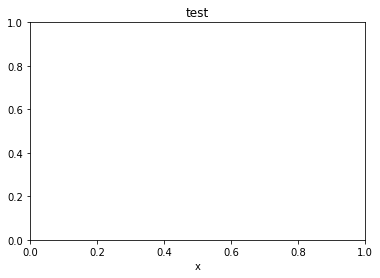

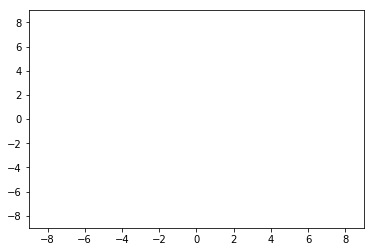

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()